In [1]:
import folium
import geopandas as gpd
import numpy as np
import pandas as pd

In [2]:
from shapely import LineString

df = pd.read_parquet("data/train_cleaned.parquet", columns=["START", "END", "POLYLINE"])
df["geometry"] = df["POLYLINE"].apply(lambda poly: LineString(eval(poly))
                                      if isinstance(poly, str) else LineString(poly))
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

In [3]:
gdf

,START,END,POLYLINE,geometry
0,"[-8.618643, 41.141412]","[-8.630838, 41.154489]","[[-8.618643, 41.141412], [-8.618499, 41.141376...","LINESTRING (-8.61864 41.14141, -8.6185 41.1413..."
1,"[-8.639847, 41.159826]","[-8.66574, 41.170671]","[[-8.639847, 41.159826], [-8.640351, 41.159871...","LINESTRING (-8.63985 41.15983, -8.64035 41.159..."
2,"[-8.612964, 41.140359]","[-8.61597, 41.14053]","[[-8.612964, 41.140359], [-8.613378, 41.14035]...","LINESTRING (-8.61296 41.14036, -8.61338 41.140..."
3,"[-8.574678, 41.151951]","[-8.607996, 41.142915]","[[-8.574678, 41.151951], [-8.574705, 41.151942...","LINESTRING (-8.57468 41.15195, -8.5747 41.1519..."
4,"[-8.645994, 41.18049]","[-8.687268, 41.178087]","[[-8.645994, 41.18049], [-8.645949, 41.180517]...","LINESTRING (-8.64599 41.18049, -8.64595 41.180..."
...,...,...,...,...
1658509,"[-8.60697, 41.162283]","[-8.608158, 41.162382]","[[-8.60697, 41.162283], [-8.60697, 41.16231], ...","LINESTRING (-8.60697 41.16228, -8.60697 41.162..."
1658510,"[-8.612469, 41.14602]","[-8.611344, 41.171013]","[[-8.612469, 41.14602], [-8.612487, 41.145993]...","LINESTRING (-8.61247 41.14602, -8.61249 41.145..."
1658511,"[-8.610138, 41.140845]","[-8.627454, 41.158755]","[[-8.610138, 41.140845], [-8.610174, 41.140935...","LINESTRING (-8.61014 41.14084, -8.61017 41.140..."
1658512,"[-8.630712, 41.154885]","[-8.587026, 41.173524]","[[-8.630712, 41.154885], [-8.63073, 41.154813]...","LINESTRING (-8.63071 41.15488, -8.63073 41.154..."


In [4]:
# Define Portugal bounding box
lat_min, lat_max = 36.8, 42.2
lon_min, lon_max = -9.6, -6.2


# Function to check if a point is in Portugal
def in_portugal(lon, lat):
    return lon_min <= lon <= lon_max and lat_min <= lat <= lat_max


# Function to check start and end points
def trip_valid(polyline):
    if polyline is None or len(polyline) == 0:
        return False
    start = polyline[0]
    end = polyline[-1]
    return in_portugal(*start) and in_portugal(*end)


# Apply to your DataFrame
df["valid_trip"] = df["POLYLINE"].map(trip_valid)

# Filter to only valid trips
df = df[df["valid_trip"]].drop(columns=["valid_trip"])
df

,START,END,POLYLINE,geometry
0,"[-8.618643, 41.141412]","[-8.630838, 41.154489]","[[-8.618643, 41.141412], [-8.618499, 41.141376...","LINESTRING (-8.618643 41.141412, -8.618499 41...."
1,"[-8.639847, 41.159826]","[-8.66574, 41.170671]","[[-8.639847, 41.159826], [-8.640351, 41.159871...","LINESTRING (-8.639847 41.159826, -8.640351 41...."
2,"[-8.612964, 41.140359]","[-8.61597, 41.14053]","[[-8.612964, 41.140359], [-8.613378, 41.14035]...","LINESTRING (-8.612964 41.140359, -8.613378 41...."
3,"[-8.574678, 41.151951]","[-8.607996, 41.142915]","[[-8.574678, 41.151951], [-8.574705, 41.151942...","LINESTRING (-8.574678 41.151951, -8.574705 41...."
4,"[-8.645994, 41.18049]","[-8.687268, 41.178087]","[[-8.645994, 41.18049], [-8.645949, 41.180517]...","LINESTRING (-8.645994 41.18049, -8.645949 41.1..."
...,...,...,...,...
1658509,"[-8.60697, 41.162283]","[-8.608158, 41.162382]","[[-8.60697, 41.162283], [-8.60697, 41.16231], ...","LINESTRING (-8.60697 41.162283, -8.60697 41.16..."
1658510,"[-8.612469, 41.14602]","[-8.611344, 41.171013]","[[-8.612469, 41.14602], [-8.612487, 41.145993]...","LINESTRING (-8.612469 41.14602, -8.612487 41.1..."
1658511,"[-8.610138, 41.140845]","[-8.627454, 41.158755]","[[-8.610138, 41.140845], [-8.610174, 41.140935...","LINESTRING (-8.610138 41.140845, -8.610174 41...."
1658512,"[-8.630712, 41.154885]","[-8.587026, 41.173524]","[[-8.630712, 41.154885], [-8.63073, 41.154813]...","LINESTRING (-8.630712 41.154885, -8.63073 41.1..."


In [5]:
def haversine(lon1, lat1, lon2, lat2):
    # Calculate the great circle distance between two points on the earth (in km)
    R = 6371  # Earth radius in kilometers
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c


def trip_length(polyline):
    # Polyline is an array of arrays of coordinates
    # [[lon1, lat1], [lon2, lat2], ...]
    if isinstance(polyline, str):
        polyline = eval(polyline)
    if len(polyline) < 2:
        return 0.0
    total_length = 0.0
    for i in range(len(polyline) - 1):
        lon1, lat1 = polyline[i]
        lon2, lat2 = polyline[i + 1]
        total_length += haversine(lon1, lat1, lon2, lat2)
    return total_length

# Compute trip lengths
df["trip_length_km"] = df["POLYLINE"].map(trip_length)

# Compute average trip length
average_length = df["trip_length_km"].mean()
print(f"Average trip length: {average_length:.2f} km")

Average trip length: 5.67 km


In [6]:
# Longest trips
longest_trips = df.nlargest(9, "trip_length_km").tail(5)
longest_trips 

,START,END,POLYLINE,geometry,trip_length_km
740361,"[-8.557533, 40.846599]","[-8.637651, 41.096223]","[[-8.557533, 40.846599], [-8.555796, 40.842054...","LINESTRING (-8.557533 40.846599, -8.555796 40....",751.592221
956634,"[-8.680986, 41.157567]","[-8.642286, 41.070501]","[[-8.680986, 41.157567], [-8.680167, 41.156604...","LINESTRING (-8.680986 41.157567, -8.680167 41....",670.815827
975406,"[-8.672364, 41.154831]","[-8.682021, 41.158863]","[[-8.672364, 41.154831], [-8.670393, 41.155974...","LINESTRING (-8.672364 41.154831, -8.670393 41....",642.210244
586970,"[-8.646318, 41.157072]","[-8.663112, 41.163435]","[[-8.646318, 41.157072], [-8.644878, 41.153787...","LINESTRING (-8.646318 41.157072, -8.644878 41....",635.516136
5357,"[-8.630793, 41.154606]","[-9.136584, 38.71548]","[[-8.630793, 41.154606], [-8.630829, 41.154309...","LINESTRING (-8.630793 41.154606, -8.630829 41....",635.263114


In [7]:
# PLot these trips on a map
from shapely.geometry import LineString
import geopandas as gpd
import folium

# Extract top 5 trips
top5 = longest_trips.copy()
top5["geometry"] = top5["POLYLINE"].apply(lambda poly: LineString(eval(poly))
                                          if isinstance(poly, str) else LineString(poly))
top5_gdf = gpd.GeoDataFrame(top5, geometry="geometry", crs="EPSG:4326")

# Center the map around the average coordinates
centroid = top5_gdf.geometry.union_all().centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=8, tiles="CartoDB positron")

# Add trips to map
colors = ["red", "blue", "green", "purple", "orange"]
for idx, row in top5_gdf.iterrows():
    folium.PolyLine(
        locations=[(lat, lon) for lon, lat in row.geometry.coords],  # folium expects (lat, lon)
        color=colors[idx % len(colors)],
        weight=4,
        opacity=0.8,
        popup=f"Trip Length: {row['trip_length_km']:.2f} km").add_to(m)

# Save or display map
m.save("visuals/longest_trips.html")
m


In [8]:
# Shortest trips with length more than 500m
shortest_trips = df[df["trip_length_km"] > 0.5].nsmallest(50, "trip_length_km")


In [9]:
bottom5 = shortest_trips.copy()
bottom5["geometry"] = bottom5["POLYLINE"].apply(lambda poly: LineString(eval(poly))
                                          if isinstance(poly, str) else LineString(poly))
bottom5_gdf = gpd.GeoDataFrame(bottom5, geometry="geometry", crs="EPSG:4326")
# Center the map around the average coordinates
centroid = bottom5_gdf.geometry.union_all().centroid
m = folium.Map(location=[centroid.y, centroid.x], zoom_start=13, tiles="CartoDB positron")
# Add trips to map
colors = ["red", "blue", "green", "purple", "orange"]
for idx, row in bottom5_gdf.iterrows():
    folium.PolyLine(
        locations=[(lat, lon) for lon, lat in row.geometry.coords],  # folium expects (lat, lon)
        color=colors[idx % len(colors)],
        weight=4,
        opacity=0.8,
        popup=f"Trip Length: {row['trip_length_km']:.2f} km").add_to(m)
# Save or display map
m.save("visuals/shortest_trips.html")
m

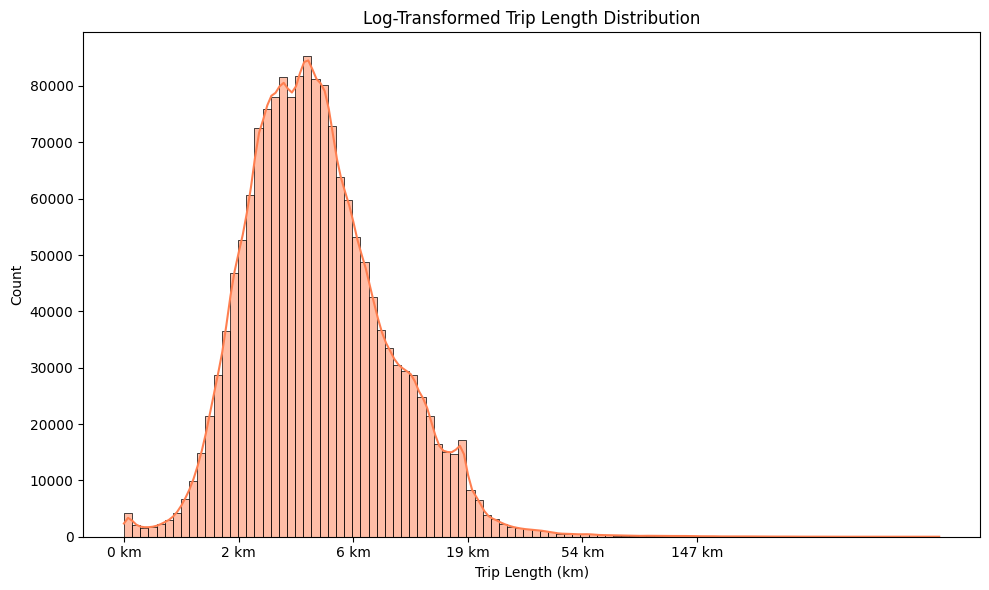

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.histplot(np.log1p(df["trip_length_km"]), bins=100, kde=True, color="coral")
ax.set_title("Log-Transformed Trip Length Distribution")
ax.set_xlabel("Trip Length (km)")

# Set x-ticks to real km values (log-transformed)
ticks = [0, 1, 2, 3, 4, 5]
labels = [f"{np.expm1(tick):.0f} km" for tick in ticks]
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()


In [11]:
df2 = pd.read_parquet("data/train_cleaned.parquet", columns=["CALL_TYPE"])
# Merge with the original DataFrame
df2 = df2.merge(df, left_index=True, right_index=True)

In [12]:
# Average trip length by calltype (A B or C)
df2.groupby("CALL_TYPE")["trip_length_km"].mean().reset_index()

,CALL_TYPE,trip_length_km
0,A,5.443922
1,B,5.124387
2,C,6.740908


In [13]:
df2 = pd.read_parquet("data/train_cleaned.parquet", columns=["TAXI_ID"])
# Merge with the original DataFrame
df2 = df2.merge(df, left_index=True, right_index=True)
# Average trip length by taxi id
df2 = df2.groupby("TAXI_ID")["trip_length_km"].mean().reset_index()

# Top 10 taxi ids with the longest average trip length
top10_taxi_ids = df2.nlargest(10, "trip_length_km")
top10_taxi_ids

,TAXI_ID,trip_length_km
436,20000902,25.985339
322,20000510,20.674878
336,20000534,15.671289
253,20000393,13.687070
311,20000496,13.088567
438,20000904,12.771467
362,20000579,11.443790
199,20000312,11.198060
112,20000163,10.647349
227,20000351,10.459753


In [14]:
# bottom 10 taxi ids with the shortest average trip length
bottom10_taxi_ids = df2.nsmallest(10, "trip_length_km")
bottom10_taxi_ids

,TAXI_ID,trip_length_km
439,20000941,0.092154
440,20000969,0.109400
60,20000080,2.773500
37,20000047,4.038488
115,20000170,4.042325
16,20000018,4.229117
49,20000066,4.265363
252,20000392,4.269059
330,20000521,4.270679
119,20000174,4.275174


In [15]:
# Trip length by hour of the day
df2 = pd.read_parquet("data/train_cleaned.parquet", columns=["TIMESTAMP"])
df2 = df2.merge(df, left_index=True, right_index=True)
df2

,TIMESTAMP,START,END,POLYLINE,geometry,trip_length_km
0,"[2013-07-01T00:00:58.000000, 2013-07-01T00:01:...","[-8.618643, 41.141412]","[-8.630838, 41.154489]","[[-8.618643, 41.141412], [-8.618499, 41.141376...","LINESTRING (-8.618643 41.141412, -8.618499 41....",2.651048
1,"[2013-07-01T00:08:23.000000, 2013-07-01T00:08:...","[-8.639847, 41.159826]","[-8.66574, 41.170671]","[[-8.639847, 41.159826], [-8.640351, 41.159871...","LINESTRING (-8.639847 41.159826, -8.640351 41....",3.456269
2,"[2013-07-01T00:02:31.000000, 2013-07-01T00:02:...","[-8.612964, 41.140359]","[-8.61597, 41.14053]","[[-8.612964, 41.140359], [-8.613378, 41.14035]...","LINESTRING (-8.612964 41.140359, -8.613378 41....",17.630449
3,"[2013-07-01T00:00:54.000000, 2013-07-01T00:01:...","[-8.574678, 41.151951]","[-8.607996, 41.142915]","[[-8.574678, 41.151951], [-8.574705, 41.151942...","LINESTRING (-8.574678 41.151951, -8.574705 41....",7.968045
4,"[2013-07-01T00:04:51.000000, 2013-07-01T00:05:...","[-8.645994, 41.18049]","[-8.687268, 41.178087]","[[-8.645994, 41.18049], [-8.645949, 41.180517]...","LINESTRING (-8.645994 41.18049, -8.645949 41.1...",4.814326
...,...,...,...,...,...,...
1658509,"[2014-01-02T11:00:27.000000, 2014-01-02T11:00:...","[-8.60697, 41.162283]","[-8.608158, 41.162382]","[[-8.60697, 41.162283], [-8.60697, 41.16231], ...","LINESTRING (-8.60697 41.162283, -8.60697 41.16...",0.839417
1658510,"[2014-06-30T23:37:43.000000, 2014-06-30T23:37:...","[-8.612469, 41.14602]","[-8.611344, 41.171013]","[[-8.612469, 41.14602], [-8.612487, 41.145993]...","LINESTRING (-8.612469 41.14602, -8.612487 41.1...",3.167711
1658511,"[2014-06-30T23:36:07.000000, 2014-06-30T23:36:...","[-8.610138, 41.140845]","[-8.627454, 41.158755]","[[-8.610138, 41.140845], [-8.610174, 41.140935...","LINESTRING (-8.610138 41.140845, -8.610174 41....",3.831302
1658512,"[2014-06-30T15:23:46.000000, 2014-06-30T15:24:...","[-8.630712, 41.154885]","[-8.587026, 41.173524]","[[-8.630712, 41.154885], [-8.63073, 41.154813]...","LINESTRING (-8.630712 41.154885, -8.63073 41.1...",5.329785


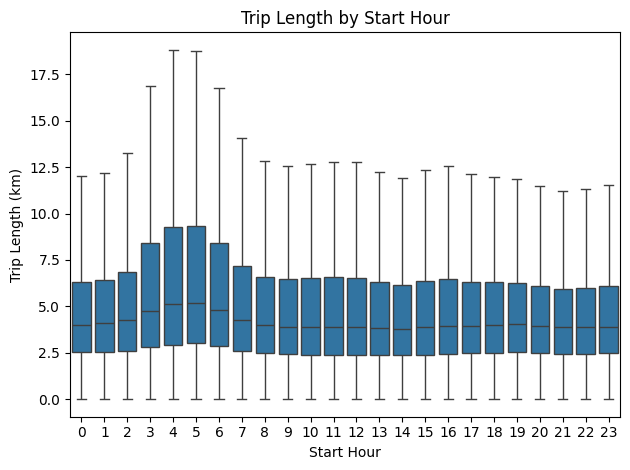

In [16]:
# Trip length by start hour
df2["start_time"] = df2["TIMESTAMP"].apply(lambda x: x[0])
df2["start_hour"] = df2["start_time"].dt.hour
df2["start_weekday"] = df2["start_time"].dt.weekday
df2["start_month"] = df2["start_time"].dt.month

sns.boxplot(x="start_hour", y="trip_length_km", data=df2, showfliers=False)
plt.title("Trip Length by Start Hour")
plt.xlabel("Start Hour")
plt.ylabel("Trip Length (km)")
plt.tight_layout()
plt.savefig("visuals/trip_length_by_start_hour.png")
plt.show()

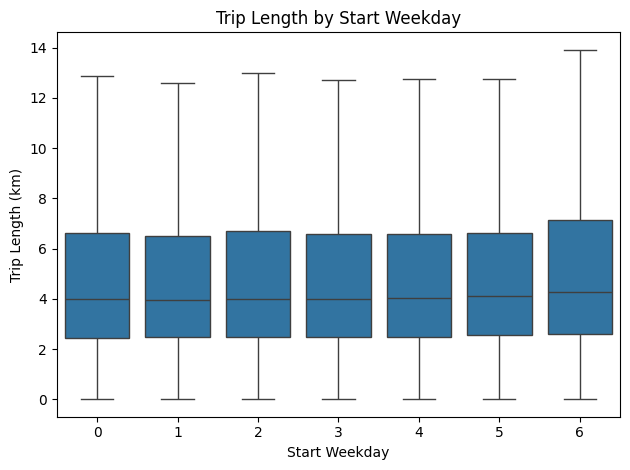

In [17]:
# By weekday
sns.boxplot(x="start_weekday", y="trip_length_km", data=df2, showfliers=False)
plt.title("Trip Length by Start Weekday")
plt.xlabel("Start Weekday")
plt.ylabel("Trip Length (km)")
plt.tight_layout()
plt.savefig("visuals/trip_length_by_start_weekday.png")
plt.show()

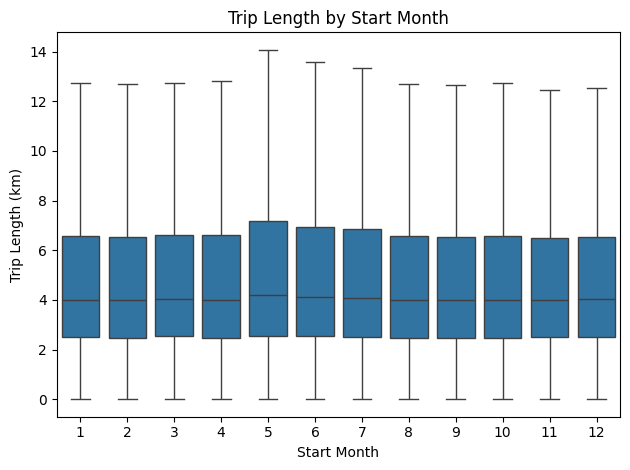

In [18]:
# By month
sns.boxplot(x="start_month", y="trip_length_km", data=df2, showfliers=False)
plt.title("Trip Length by Start Month")
plt.xlabel("Start Month")
plt.ylabel("Trip Length (km)")
plt.tight_layout()
plt.savefig("visuals/trip_length_by_start_month.png")
plt.show()

In [20]:
df2 = pd.read_parquet("data/train_cleaned.parquet", columns=["TAXI_ID"])
df = df2.merge(df, left_index=True, right_index=True)

# 1. Compute trip duration in hours
# Assuming each POLYLINE point is 15 seconds apart
df["trip_duration_hours"] = df["POLYLINE"].apply(lambda poly: max((len(poly) - 1) * 15 / 3600, 1e-6))

# 2. Compute average speed (km/h)
df["average_speed_kmh"] = df["trip_length_km"] / df["trip_duration_hours"]


# 3. Compute straight-line (haversine) distance between start and end
def straight_line(poly):
    if isinstance(poly, str):
        poly = eval(poly)
    if len(poly) < 2:
        return 0.0
    lon1, lat1 = poly[0]
    lon2, lat2 = poly[-1]
    return haversine(lon1, lat1, lon2, lat2)


df["straight_line_km"] = df["POLYLINE"].map(straight_line)

# 4. Compute directness
df["directness"] = df["straight_line_km"] / df["trip_length_km"]
df["directness"] = df["directness"].replace([np.inf, -np.inf], np.nan).fillna(0)

# 5. Aggregate by TAXI_ID
taxi_stats = df.groupby("TAXI_ID").agg(avg_speed_kmh=("average_speed_kmh", "mean"),
                                       avg_directness=("directness", "mean"),
                                       trip_count=("TAXI_ID", "count")).reset_index()

# Top 10 taxis by average speed
top_speed = taxi_stats.nlargest(10, "avg_speed_kmh")
print("Top 10 taxis by average speed:")
print(top_speed)

# Top 10 taxis by directness
top_direct = taxi_stats.nlargest(10, "avg_directness")
print("\nTop 10 taxis by route directness:")
print(top_direct)

Top 10 taxis by average speed:
      TAXI_ID  avg_speed_kmh  avg_directness  trip_count
253  20000393      44.887362        0.573850        2735
322  20000510      43.550528        0.585833         629
336  20000534      42.741998        0.525630        2055
311  20000496      42.153447        0.621373        2575
227  20000351      41.084020        0.621432        5414
299  20000477      36.914242        0.650508        2240
247  20000386      36.474988        0.647937        3405
215  20000334      35.030904        0.620701        3411
208  20000327      34.877035        0.595833        2776
66   20000089      34.777115        0.677723        6923

Top 10 taxis by route directness:
      TAXI_ID  avg_speed_kmh  avg_directness  trip_count
60   20000080      21.596862        0.722707        3387
224  20000346      28.662107        0.715347        2655
114  20000167      31.325908        0.711395        5190
133  20000196      30.350104        0.707972        4043
49   20000066      26.

In [ ]:
# average speed of taxis (mean)
taxi_stats["avg_speed_kmh"].describe()

count    441.000000
mean      26.925531
std        3.877879
min        0.865486
25%       24.743283
50%       26.910637
75%       28.758994
max       44.887362
Name: avg_speed_kmh, dtype: float64

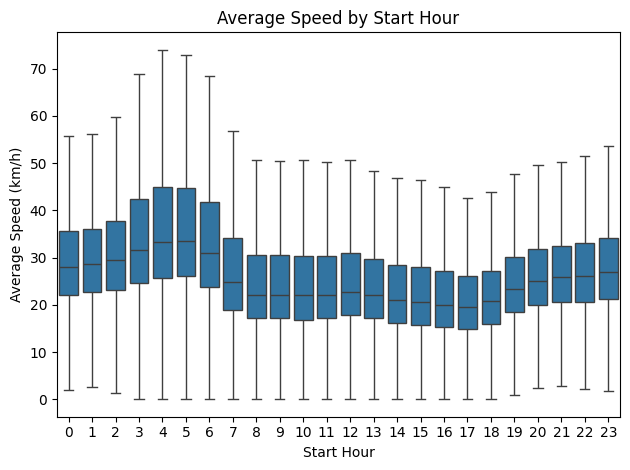

In [ ]:
# average speed by hour of the day
df2 = pd.read_parquet("data/train_cleaned.parquet", columns=["TIMESTAMP"])
df2 = df2.merge(df, left_index=True, right_index=True)
df2["start_time"] = df2["TIMESTAMP"].apply(lambda x: x[0])
df2["start_hour"] = df2["start_time"].dt.hour
df2["start_weekday"] = df2["start_time"].dt.weekday
df2["start_month"] = df2["start_time"].dt.month
sns.boxplot(x="start_hour", y="average_speed_kmh", data=df2, showfliers=False)
plt.title("Average Speed by Start Hour")
plt.xlabel("Start Hour")
plt.ylabel("Average Speed (km/h)")
plt.tight_layout()
plt.savefig("visuals/average_speed_by_start_hour.png")
plt.show()

  CALL_TYPE  trip_length_km
0         A        5.443922
1         B        5.124387
2         C        6.740908


/tmp/ipykernel_208161/1385837475.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CALL_TYPE", y="trip_length_km", data=avg_length_by_calltype, palette="viridis")


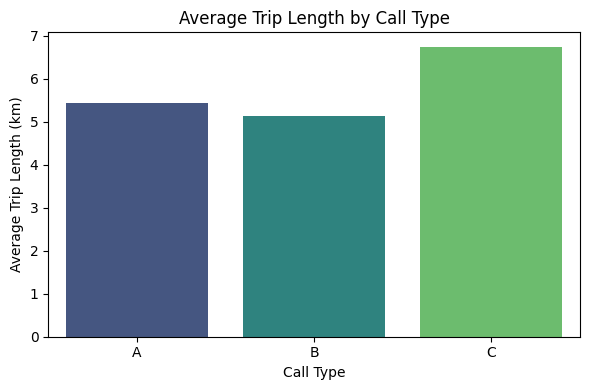

In [27]:
df2 = pd.read_parquet("data/train_cleaned.parquet", columns=["CALL_TYPE"])
# Merge with the original DataFrame
df2 = df2.merge(df, left_index=True, right_index=True)

# Average trip length by call type
avg_length_by_calltype = df2.groupby("CALL_TYPE")["trip_length_km"].mean().reset_index()
print(avg_length_by_calltype)


plt.figure(figsize=(6, 4))
sns.barplot(x="CALL_TYPE", y="trip_length_km", data=avg_length_by_calltype, palette="viridis")
plt.title("Average Trip Length by Call Type")
plt.xlabel("Call Type")
plt.ylabel("Average Trip Length (km)")
plt.tight_layout()
plt.show()

In [29]:
# Compute trip duration in seconds for each trip
df["trip_duration_seconds"] = df["POLYLINE"].apply(lambda poly: max((len(poly) - 1) * 15, 0))

# Compute average trip duration in seconds
average_duration_seconds = df["trip_duration_seconds"].mean()
print(f"Average trip duration: {average_duration_seconds:.2f} seconds")
print(f"Average trip duration: {average_duration_seconds / 60:.2f} minutes")

Average trip duration: 738.69 seconds
Average trip duration: 12.31 minutes


  CALL_TYPE  trip_duration_seconds
0         A             757.556452
1         B             675.242724
2         C             828.759754


/tmp/ipykernel_208161/3252435883.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="CALL_TYPE", y="trip_duration_seconds", data=avg_duration_by_calltype, palette="viridis")


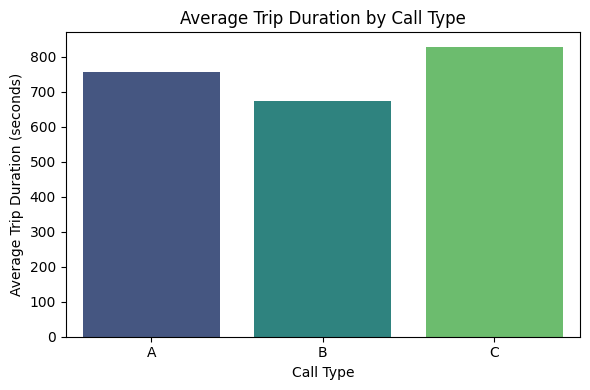

In [33]:
df2 = pd.read_parquet("data/train_cleaned.parquet", columns=["CALL_TYPE"])
# Merge with the original DataFrame
df2 = df2.merge(df, left_index=True, right_index=True)

# Average trip duration in seconds by call type
avg_duration_by_calltype = df2.groupby("CALL_TYPE")["trip_duration_seconds"].mean().reset_index()
print(avg_duration_by_calltype)
plt.figure(figsize=(6, 4))
sns.barplot(x="CALL_TYPE", y="trip_duration_seconds", data=avg_duration_by_calltype, palette="viridis")
plt.title("Average Trip Duration by Call Type")
plt.xlabel("Call Type")
plt.ylabel("Average Trip Duration (seconds)")
plt.tight_layout()
plt.savefig("visuals/average_trip_duration_by_call_type.png")
plt.show()

    ORIGIN_STAND  trip_length_km
58            59        7.735370
14            15        7.638999
21            22        6.442061
44            45        6.434164
45            46        6.409260
32            33        6.238239
39            40        6.024089
8              9        5.949563
4              5        5.668142
48            49        5.598100
    ORIGIN_STAND  trip_length_km
50            51        3.736775
61            62        3.825304
62            63        3.850334
18            19        3.878667
57            58        3.908384
10            11        3.981126
12            13        4.035399
43            44        4.066380
27            28        4.075161
53            54        4.094665


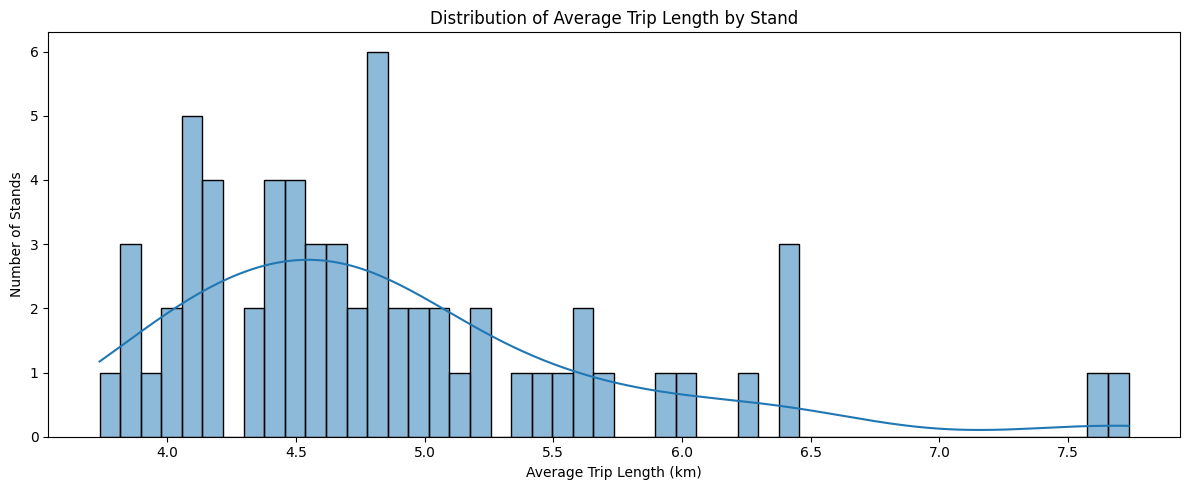

In [37]:
# Compute average trip length by stand
if "ORIGIN_STAND" not in df.columns:
    # Load ORIGIN_STAND if not present
    df2 = pd.read_parquet("data/train_cleaned.parquet", columns=["ORIGIN_STAND"])
    df2 = df2.merge(df, left_index=True, right_index=True)

avg_length_by_stand = df2.groupby("ORIGIN_STAND")["trip_length_km"].mean().reset_index()
print(avg_length_by_stand.sort_values("trip_length_km", ascending=False).head(10))  # Top 10 longest
print(avg_length_by_stand.sort_values("trip_length_km", ascending=True).head(10))  # Top 10 shortest

plt.figure(figsize=(12, 5))
sns.histplot(avg_length_by_stand["trip_length_km"], bins=50, kde=True)
plt.title("Distribution of Average Trip Length by Stand")
plt.xlabel("Average Trip Length (km)")
plt.ylabel("Number of Stands")
plt.tight_layout()
plt.show()

### Clustering

In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

df = pd.read_parquet("data/train_cleaned.parquet", columns=["START", "END", "POLYLINE"])

# Function to extract start and end coordinates from START and END
def get_start_end(row):
    start = row["START"]
    end = row["END"]
    return start[0], start[1], end[0], end[1]


df[["start_lon", "start_lat", "end_lon", "end_lat"]] = df.apply(get_start_end, axis=1, result_type="expand")

In [2]:
# Remove rows with NaN
features = df.dropna(subset=["start_lon", "start_lat", "end_lon", "end_lat"]).sample(frac=0.1, random_state=42)
features[["start_lon", "start_lat", "end_lon", "end_lat"]] = features[["start_lon", "start_lat", "end_lon",
                                                                       "end_lat"]].astype(np.float32)
X = features[["start_lon", "start_lat", "end_lon", "end_lat"]].values

# Cluster with DBSCAN (tune eps and min_samples as needed)
db = DBSCAN(eps=0.01, min_samples=30).fit(X)
features["corridor_cluster"] = db.labels_

# Analyze clusters
print(features["corridor_cluster"].value_counts())

#import folium
from shapely.geometry import LineString
import folium

# Choose clusters to plot (e.g., top 5 largest clusters, excluding noise cluster -1)
top_clusters = features["corridor_cluster"].value_counts().loc[lambda x: x.index != -1].head(5).index

# Center map on the mean of all start points
center_lat = features["start_lat"].mean()
center_lon = features["start_lon"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12, tiles="CartoDB positron")

colors = ["red", "blue", "green", "purple", "orange", "black", "pink", "brown", "gray", "olive"]

for i, cluster in enumerate(top_clusters):
    cluster_trips = features[features["corridor_cluster"] == cluster]
    # Plot up to 50 polylines per cluster for clarity
    for _, row in cluster_trips.sample(n=min(50, len(cluster_trips)), random_state=42).iterrows():
        poly = row["POLYLINE"]
        if isinstance(poly, str):
            poly = eval(poly)
        folium.PolyLine(locations=[(lat, lon) for lon, lat in poly],
                        color=colors[i % len(colors)],
                        weight=3,
                        opacity=0.5).add_to(m)

m.save("visuals/corridor_clusters_map.html")
m

corridor_cluster
 0    152170
-1      7140
 1      6095
 2       163
 4        68
 3        50
 5        42
 9        32
 6        31
 8        30
 7        30
Name: count, dtype: int64
